In [14]:
import numpy as np
import pandas as pd
import joblib

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [15]:
# Paths to files
TEST_FEATURE_MATRIX = 'C:/Users/rachi/Downloads/Model4/test-features.txt'
TEST_TARGET_FILE = 'C:/Users/rachi/Downloads/Model4/test-target.txt'

# Load features and target
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')


In [16]:
nb = joblib.load('naive_bayes_model.pkl')
lr = joblib.load('logistic_regression_model.pkl')
rf = joblib.load('random_forest_model.pkl')


In [17]:
import pandas as pd

# Load the saved data
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()


C:\Users\rachi\AppData\Local\Temp\ipykernel_14500\4040269414.py:4: DtypeWarning: Columns (767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,99

/tmp/ipykernel_8420/4040269414.py:5: DtypeWarning: Columns (785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: using TF-IDF (adapt if you're using CountVectorizer or similar)
vectorizer = TfidfVectorizer()

# Fit on training text and transform both sets
X_train_vectorized = vectorizer.fit_transform(X_train)  # <- your raw training text
X_test_vectorized = vectorizer.transform(X_test)        # <- your raw test text


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# 1. Load your data
df = pd.read_csv('enron_spam_data.csv')  # change this to your actual file name

# 2. Handle missing values
df.dropna(subset=['Message', 'Spam/Ham'], inplace=True)  # Remove rows with missing values

# 3. Select text and labels
X_raw = df['Message']
y = df['Spam/Ham']

# 4. Train/test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=42)

# 5. Vectorize text
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_raw)
X_test_vectorized = vectorizer.transform(X_test_raw)

# 6. Train models
nb = MultinomialNB()
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()

nb.fit(X_train_vectorized, y_train)
lr.fit(X_train_vectorized, y_train)
rf.fit(X_train_vectorized, y_train)

# 7. Evaluate
print("Naive Bayes:")
print(classification_report(y_test, nb.predict(X_test_vectorized)))

print("\nLogistic Regression:")
print(classification_report(y_test, lr.predict(X_test_vectorized)))

print("\nRandom Forest:")
print(classification_report(y_test, rf.predict(X_test_vectorized)))

# 8. Save models
joblib.dump(nb, 'naive_bayes_model.pkl')
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4971
           1       0.99      0.99      0.99      5033

    accuracy                           0.99     10004
   macro avg       0.99      0.99      0.99     10004
weighted avg       0.99      0.99      0.99     10004


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4971
           1       0.97      1.00      0.98      5033

    accuracy                           0.98     10004
   macro avg       0.98      0.98      0.98     10004
weighted avg       0.98      0.98      0.98     10004


Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4971
           1       0.98      0.99      0.99      5033

    accuracy                           0.99     10004
   macro avg       0.99      0.99      0.99     10004
weighted avg       0.99

['tfidf_vectorizer.pkl']

In [21]:
# Generate base model predictions (probability of Spam, class 1)
nb_preds = nb.predict_proba(X_test_vectorized)[:, 1]
lr_preds = lr.predict_proba(X_test_vectorized)[:, 1]
rf_preds = rf.predict_proba(X_test_vectorized)[:, 1]


In [22]:
import numpy as np

# Stack the base model predictions into a single matrix
X_meta_test = np.column_stack([nb_preds, lr_preds, rf_preds])


In [23]:
# Load the pre-trained meta-model (stacked model)
meta_model = joblib.load('meta_model.pkl')


In [24]:
# Make final predictions using the meta-model
final_predictions = meta_model.predict(X_meta_test)


In [25]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the meta-model on the test data
print("Meta-Model Evaluation:")
print(classification_report(y_test, final_predictions))

# You can also compute the accuracy of the meta-model
accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy of the Meta-Model: {accuracy:.4f}")


Meta-Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4971
           1       0.97      1.00      0.98      5033

    accuracy                           0.98     10004
   macro avg       0.98      0.98      0.98     10004
weighted avg       0.98      0.98      0.98     10004

Accuracy of the Meta-Model: 0.9840


In [27]:
# Sanity check
assert len(y_test) == len(final_predictions), "Mismatch in prediction and test labels"

# Calculate correct and incorrect counts
correct_docs = (y_test == final_predictions).sum()
print('Docs classified correctly:', correct_docs)

numdocs_wrong = len(y_test) - correct_docs
print('Docs classified incorrectly:', numdocs_wrong)

# Calculate accuracy
accuracy = correct_docs / len(y_test)
print('Accuracy of the model is {:.2%}'.format(accuracy))

# Calculate fraction of wrong classifications
fraction_wrong = numdocs_wrong / len(y_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))


Docs classified correctly: 9844
Docs classified incorrectly: 160
Accuracy of the model is 98.40%
Fraction classified incorrectly is 1.60%


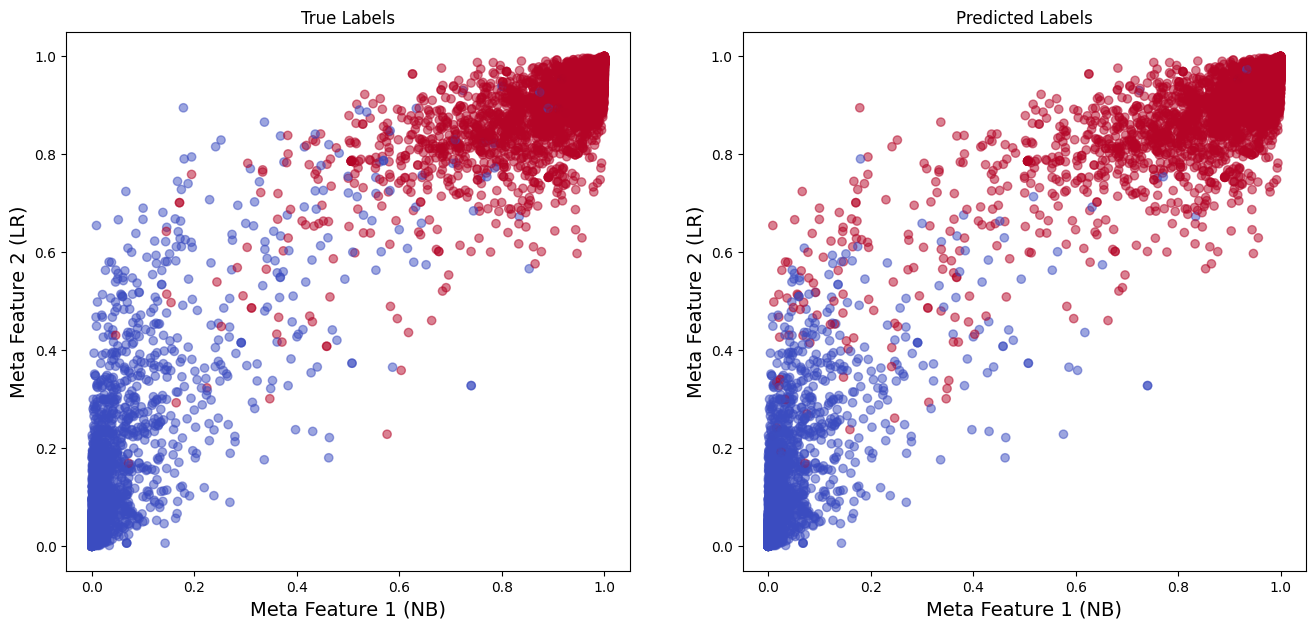

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare a DataFrame for visualization
summary_df = pd.DataFrame({
    'NB': nb_preds,
    'LR': lr_preds,
    'RF': rf_preds,
    'Actual': y_test,
    'Predicted': final_predictions
})

xaxis_label = 'Meta Feature 1 (NB)'
yaxis_label = 'Meta Feature 2 (LR)'

# Scatter plots for actual vs predicted labels
plt.figure(figsize=(16, 7))

# Chart 1: Actual labels
plt.subplot(1, 2, 1)
plt.scatter(summary_df['NB'], summary_df['LR'], c=summary_df['Actual'], cmap='coolwarm', alpha=0.5)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.title('True Labels')

# Chart 2: Predicted labels
plt.subplot(1, 2, 2)
plt.scatter(summary_df['NB'], summary_df['LR'], c=summary_df['Predicted'], cmap='coolwarm', alpha=0.5)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.title('Predicted Labels')

plt.show()


In [29]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


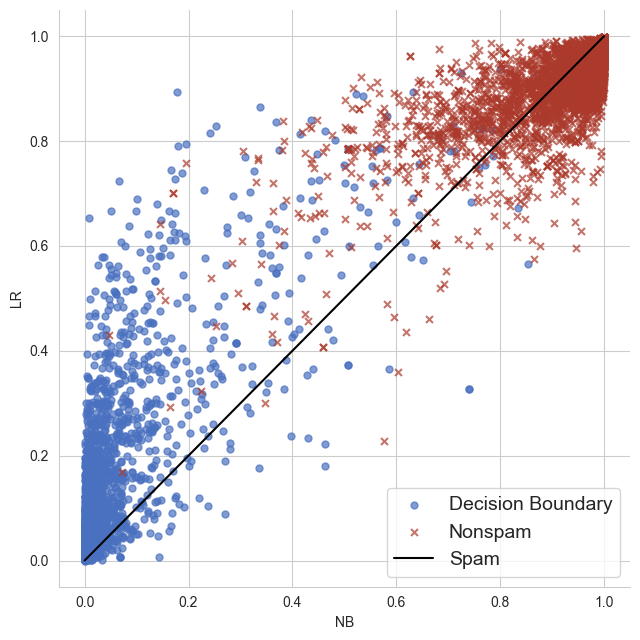

In [30]:
import seaborn as sns
import numpy as np

# Set style for Seaborn
sns.set_style('whitegrid')

# Plot the decision boundary using lmplot
labels = 'Actual'

sns.lmplot(
    x='NB', y='LR',
    data=summary_df,
    height=6.5,
    fit_reg=False,
    legend=False,
    scatter_kws={'alpha': 0.7, 's': 25},
    hue=labels,
    markers=['o', 'x'],
    palette=['#4A71C0', '#AB3A2C']
)

# Plot decision boundary line (y=x line)
linedata = np.linspace(start=0, stop=1, num=1000)
plt.plot(linedata, linedata, color='black')
plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()


In [31]:
import numpy as np

# Calculate confusion matrix values
true_pos = (y_test == 1) & (final_predictions == 1)
false_pos = (y_test == 0) & (final_predictions == 1)
false_neg = (y_test == 1) & (final_predictions == 0)
true_neg = (y_test == 0) & (final_predictions == 0)

# Display the counts
print('True Positives:', true_pos.sum())
print('False Positives:', false_pos.sum())
print('False Negatives:', false_neg.sum())
print('True Negatives:', true_neg.sum())


True Positives: 5020
False Positives: 147
False Negatives: 13
True Negatives: 4824


In [32]:
# Calculate Recall score
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))


Recall score is 99.74%


In [33]:
# Calculate Precision score
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))


Precision score is 0.972


In [34]:
# Calculate F1 Score
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))


F Score is 0.98
